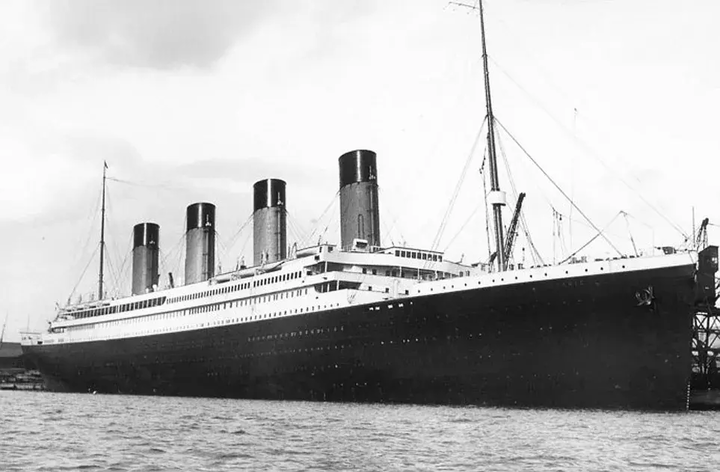

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

plt.rcParams["figure.figsize"] = (8,5)
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [4]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
sub=pd.read_csv("gender_submission.csv")


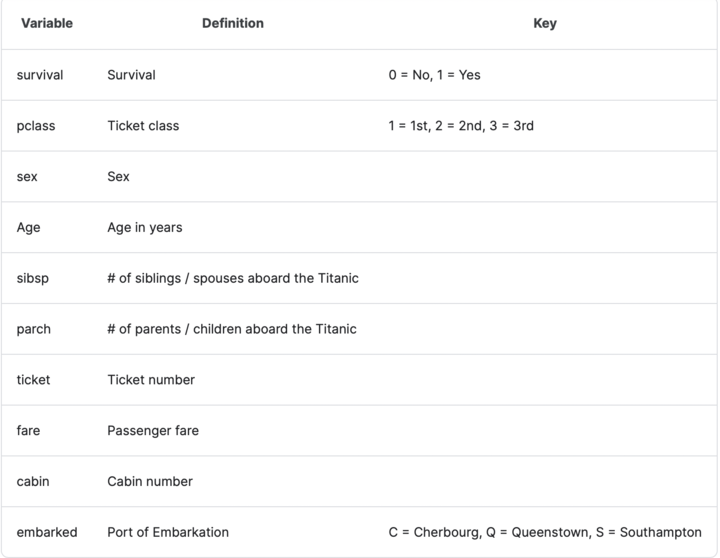


sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# Exploratory Data Analysis and Visualization

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.shape

(891, 12)

In [8]:
# General information about dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Checking the null values

train_df.isnull().sum()[train_df.isnull().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [10]:
# test_df

test_df.isnull().sum()[test_df.isnull().sum() > 0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [11]:
# want to see percentage of null value

total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [12]:
# Statistical count of all numeric columns

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Above we can see that 38% out of the training-set survived the Titanic.

We can also see that the passenger age range from 0.4 to 80 years old.

We can already detect some features that contain missing values, like the ‘Age’ feature (714 out of 891 total).

There's an outlier for the 'Fare' price because of the differences between the 75th percentile, standard deviation, and the max value (512).

In [13]:
#Find the number duplicate record


print('train_df - Number of duplicate Record:', train_df.duplicated().sum())

print('test_df - Number of duplicate Record:', test_df.duplicated().sum())

train_df - Number of duplicate Record: 0
test_df - Number of duplicate Record: 0


In [14]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data is clearly imbalanced, the count of people who survived is almost close to half the count of people who didn't survive

In [15]:
train_df.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

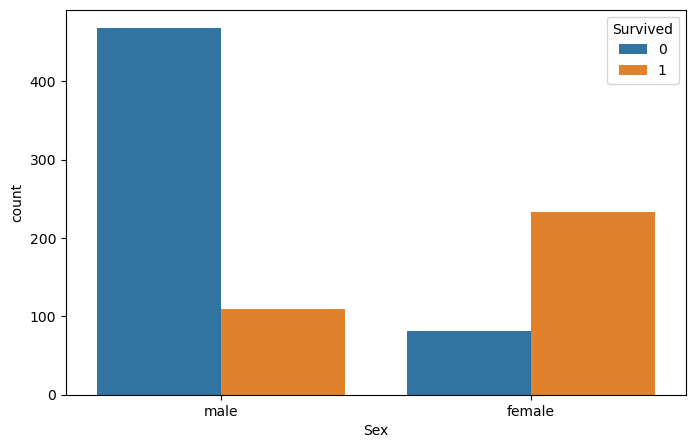

In [16]:
sns.countplot(data=train_df, x="Sex",hue="Survived");

From the above stacked plots, it is clear more percentage of female passengers survived, even though more male passesngers were aboard

In [17]:
train_df.groupby(["Sex"]).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


As previously mentioned, women are much more likely to survive than men. 74% of the women survived, while only 18% of men survived.

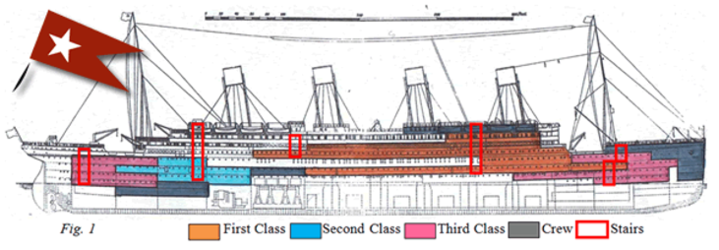

In [18]:
train_df.groupby(["Sex", "Pclass"]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

Women are much more likely to survive than men, specially women in the first and second class. It also shows that men in the first class are almost 3-times more likely to survive than men in the third class.

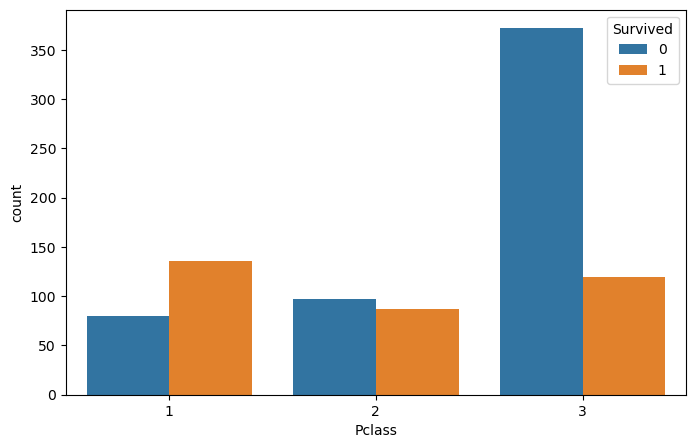

In [19]:
sns.countplot(data=train_df, x="Pclass",hue="Survived");

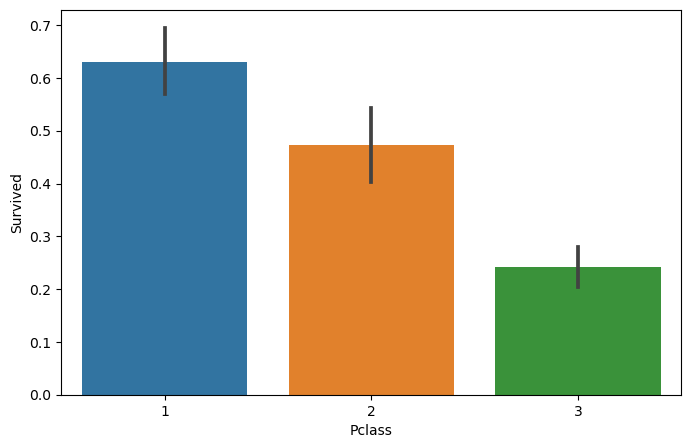

In [20]:
sns.barplot(data=train_df, x="Pclass",y="Survived");

The graphs above clearly shows that economic status (Pclass) played an important role regarding the potential survival of the Titanic passengers. First class passengers had a much higher chance of survival than passengers in the 3rd class. We note that:

63% of the 1st class passengers survived the Titanic wreck

48% of the 2nd class passenger survived

Only 24% of the 3rd class passengers survived

In [21]:
train_df[train_df["Age"]<18].groupby(["Sex", "Pclass"]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        26.241667  
       3        18.727977  
male   1       116.072900  
       2        25.659473  
       3        22.752523

Children below 18 years of age have higher chances of surviving.

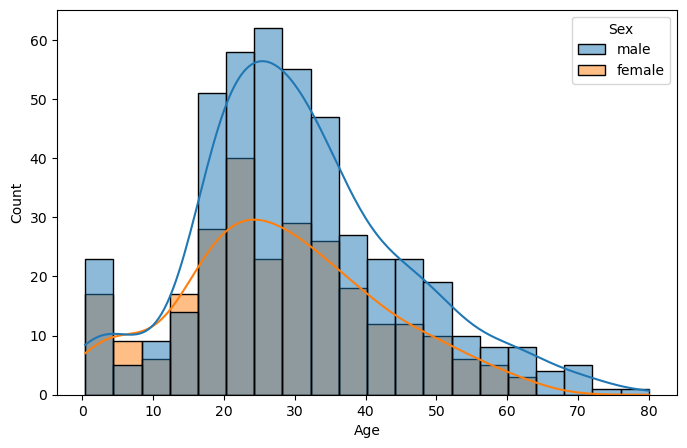

In [22]:
sns.histplot(data=train_df, x="Age",hue="Sex", kde="Survived");

We can see that men have a higher probability of survival when they are between 18 and 35 years old. For women, the survival chances are higher between 15 and 40 years old.

For men the probability of survival is very low between the ages of 5 and 18, and after 35, but that isn’t true for women. Another thing to note is that infants have a higher probability of survival.

## Correlation with target variables

In [23]:
train_df.corrwith(train_df["Survived"])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64

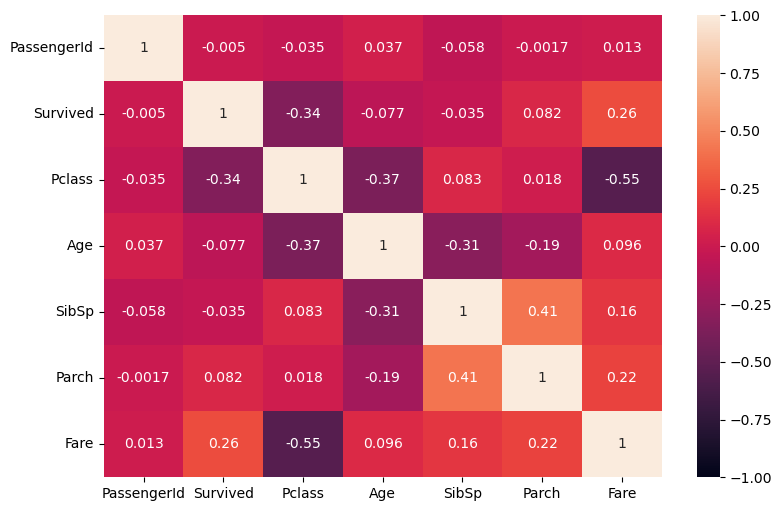

In [24]:
plt.figure(figsize=(9,6))
sns.heatmap(train_df.corr(), vmax= 1, vmin= -1, annot=True );

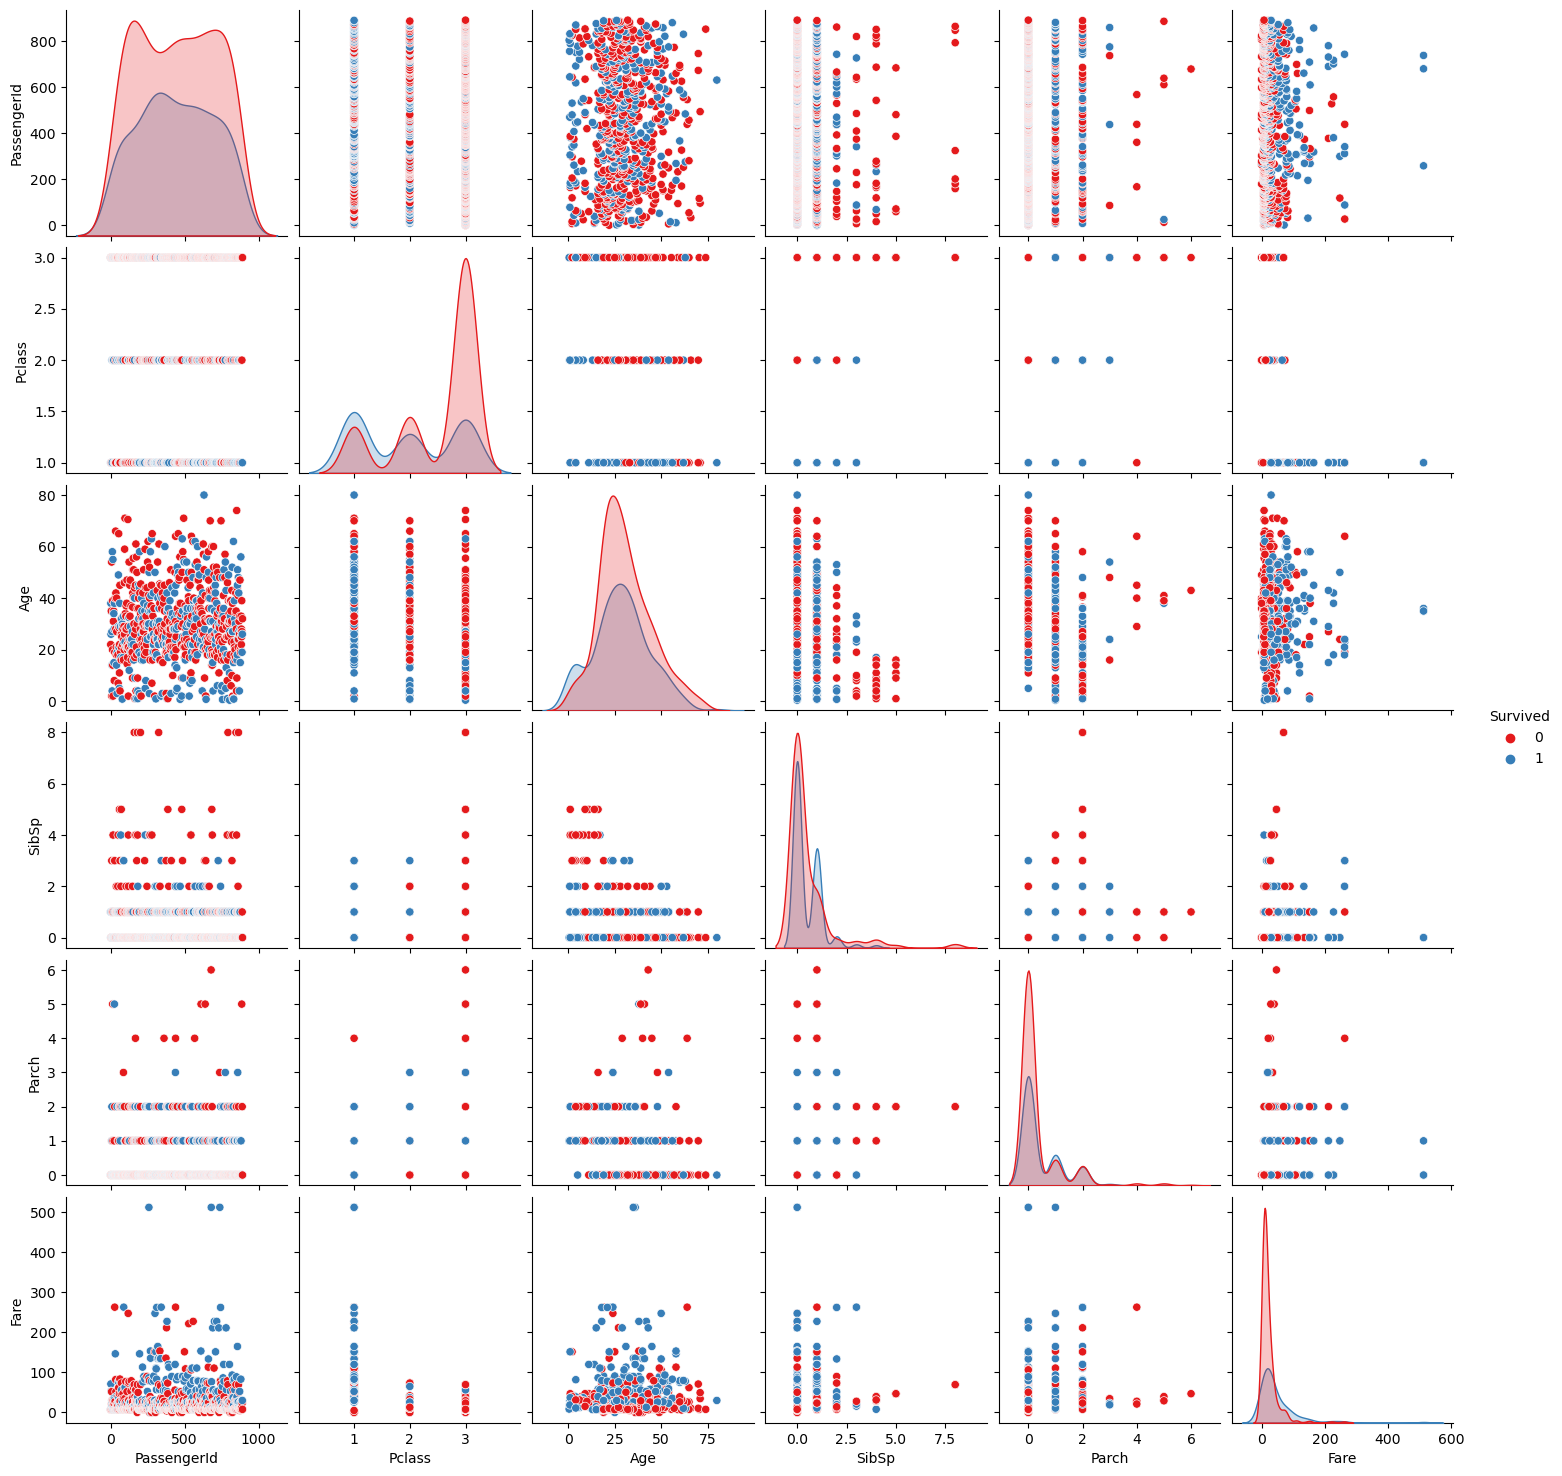

In [25]:
sns.pairplot(train_df, hue = "Survived", palette="Set1");

## Feature Generation and Removal


In [26]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [27]:
#get title

train_df["Title"] = train_df["Name"].apply( lambda x : x.split(",")[1].split(".")[0].strip())

In [28]:
train_df["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [29]:
## merge similar titles  

map_dict = {"Ms":"Miss", "Mme":"Mrs", "Sir": "Mr", "Jonkheer":"Mr", "Lady":"Mrs", "Don":"Mr", "Dona":"Mrs","Mlle":"Miss", "Col":"Soldier", "Capt":"Soldier","Major":"Soldier"}
train_df["Title"] = train_df["Title"].apply(lambda x : map_dict[x] if x in map_dict else x)

In [30]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [31]:
# We need to apply same changes on test_df,too

test_df["Title"] = test_df["Name"].apply( lambda x : x.split(",")[1].split(".")[0].strip())

map_dict = {"Ms":"Miss", "Mme":"Mrs", "Sir": "Mr", "Jonkheer":"Mr", "Lady":"Mrs", "Don":"Mr", "Dona":"Mrs","Mlle":"Miss", "Col":"Soldier", "Capt":"Soldier","Major":"Soldier"}
test_df["Title"] = test_df["Title"].apply(lambda x : map_dict[x] if x in map_dict else x)

In [32]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs


Parch
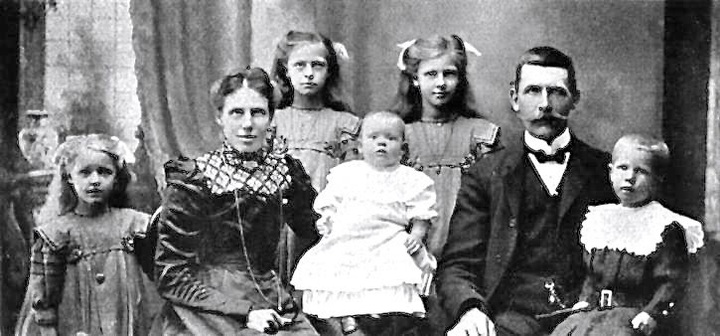

SibSp
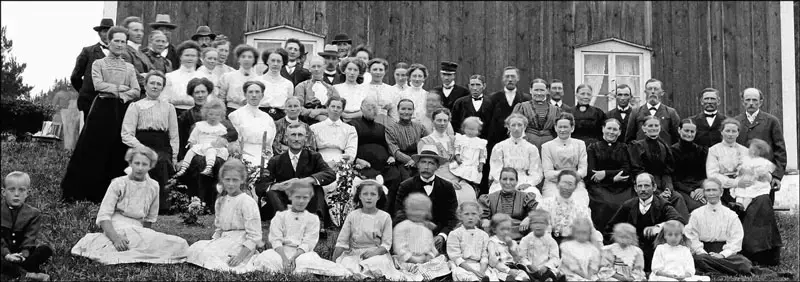

In [33]:
#Family Size

train_df['Family_Size'] = 1 + train_df['SibSp'] + train_df['Parch']


In [34]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,2


In [35]:
# for the test data

#Family Size

test_df['Family_Size'] = 1 + test_df['SibSp'] + test_df['Parch']


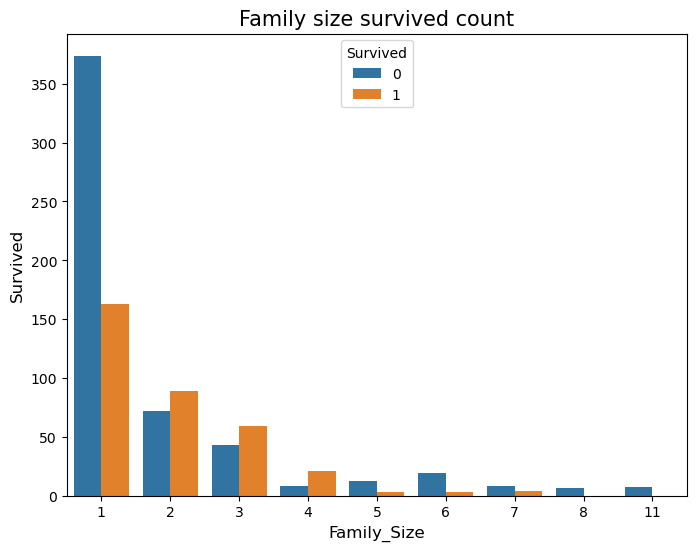

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x = train_df.Family_Size, hue = 'Survived', data = train_df)
plt.xlabel('Family_Size', fontsize = 12)
plt.ylabel('Survived', fontsize = 12)
plt.title('Family size survived count', fontsize = 15)
plt.xticks()
plt.show()

## Missing values

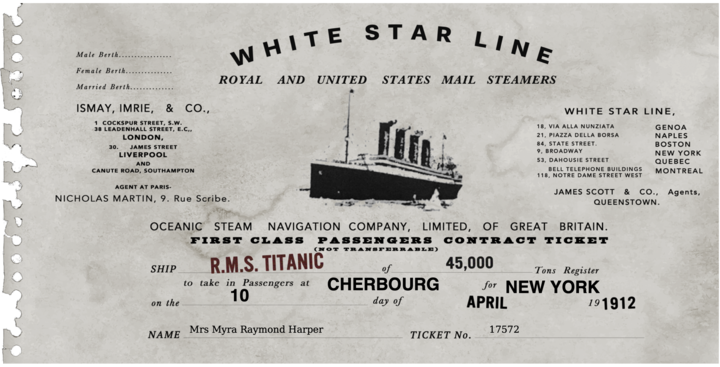

#### Embarked

In [37]:
train_df.isna().sum().sort_values(ascending=False)[:3]

Cabin       687
Age         177
Embarked      2
dtype: int64

In [38]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
# replace the null value of "Embarked" with most common letter 

train_df['Embarked'] = train_df['Embarked'].fillna('S')

#### Age

In [40]:
from sklearn.impute import KNNImputer

before_imputation = train_df[["Pclass", "SibSp", "Parch", "Fare", "Age"]]

imputer = KNNImputer()
train_df[["Pclass", "SibSp", "Parch", "Fare", "Age"]] = imputer.fit_transform(before_imputation)

In [41]:
before_imputation = test_df[["Pclass", "SibSp", "Parch", "Fare", "Age"]]

imputer = KNNImputer()
test_df[["Pclass", "SibSp", "Parch", "Fare", "Age"]] = imputer.fit_transform(before_imputation)

In [42]:
train_df['Child'] = train_df["Age"].apply(lambda i: 1 if i <= 17 and i > 6 else 0)
train_df['Toddler'] = train_df["Age"].apply(lambda i: 1 if i <= 6 else 0)
train_df['Elderly'] = train_df["Age"].apply(lambda i: 1 if i >= 60 else 0)

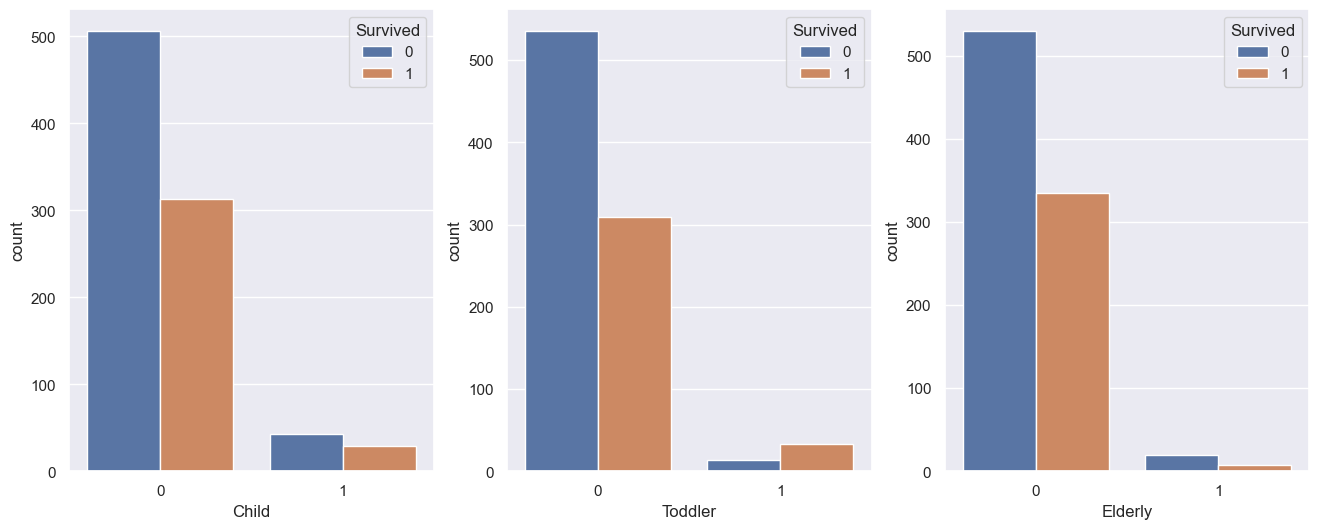

In [113]:
fig, ax = plt.subplots(1,3)
sns.countplot(data=train_df, x="Child", hue="Survived", ax=ax[0])
sns.countplot(data=train_df, x="Toddler", hue="Survived", ax=ax[1])
sns.countplot(data=train_df, x="Elderly", hue="Survived", ax=ax[2])
plt.tight_layout
plt.show()

In [44]:
test_df['Child'] = test_df["Age"].apply(lambda i: 1 if i <= 17 and i > 6 else 0)
test_df['Toddler'] =test_df["Age"].apply(lambda i: 1 if i <= 6 else 0)
test_df['Elderly'] = test_df["Age"].apply(lambda i: 1 if i >= 60 else 0)

In [45]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Cabin    687
dtype: int64

In [46]:
test_df.isnull().sum()[test_df.isnull().sum() > 0]

Cabin    327
dtype: int64

#### Cabin

In [47]:
## Since 'Cabin' has around 687 nan values which is more than 50 percent of the total data, we drop this feature


train_df['Cabin'] = train_df['Cabin'].fillna('nan')

train_df['CabinN'] = [1 if train_df['Cabin'].iloc[i] =='nan' else 0 for i in range(len(train_df))]

In [48]:
# make changes on test data

test_df['Cabin'] = test_df['Cabin'].fillna('nan')

test_df['CabinN'] = [1 if train_df['Cabin'].iloc[i] =='nan' else 0 for i in range(len(test_df))]

In [49]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Series([], dtype: int64)

In [50]:
test_df.isnull().sum()[test_df.isnull().sum() > 0]

Series([], dtype: int64)

#### Fare

In [51]:
train_df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

May need some changes

In [52]:
# fancy

train_df['Fancy'] = train_df['Fare'].apply(lambda i: 1 if i >= 100 else 0)

# standard

train_df['Standard_Fare'] = train_df['Fare'].apply(lambda i: 1 if i <= 10.0 else 0)

In [53]:
# for test data

test_df['Fancy'] =test_df['Fare'].apply(lambda i: 1 if i >= 100 else 0)


test_df['Standard_Fare'] = test_df['Fare'].apply(lambda i: 1 if i <= 10.0 else 0)

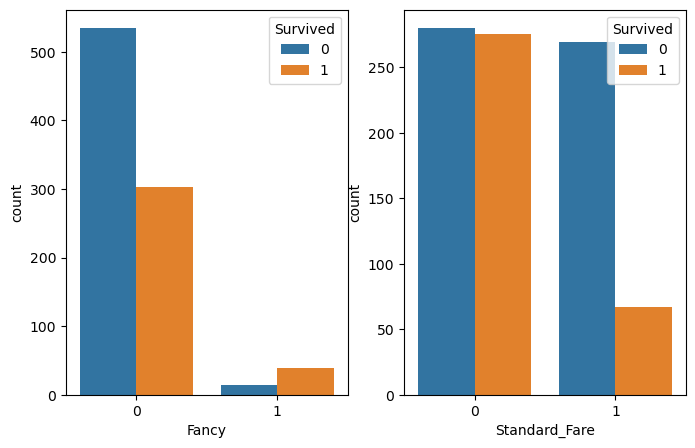

In [54]:
fig, ax = plt.subplots(1,2)
sns.countplot(data=train_df, x="Fancy", hue="Survived", ax=ax[0])
sns.countplot(data=train_df, x="Standard_Fare", hue="Survived", ax=ax[1])
plt.show()

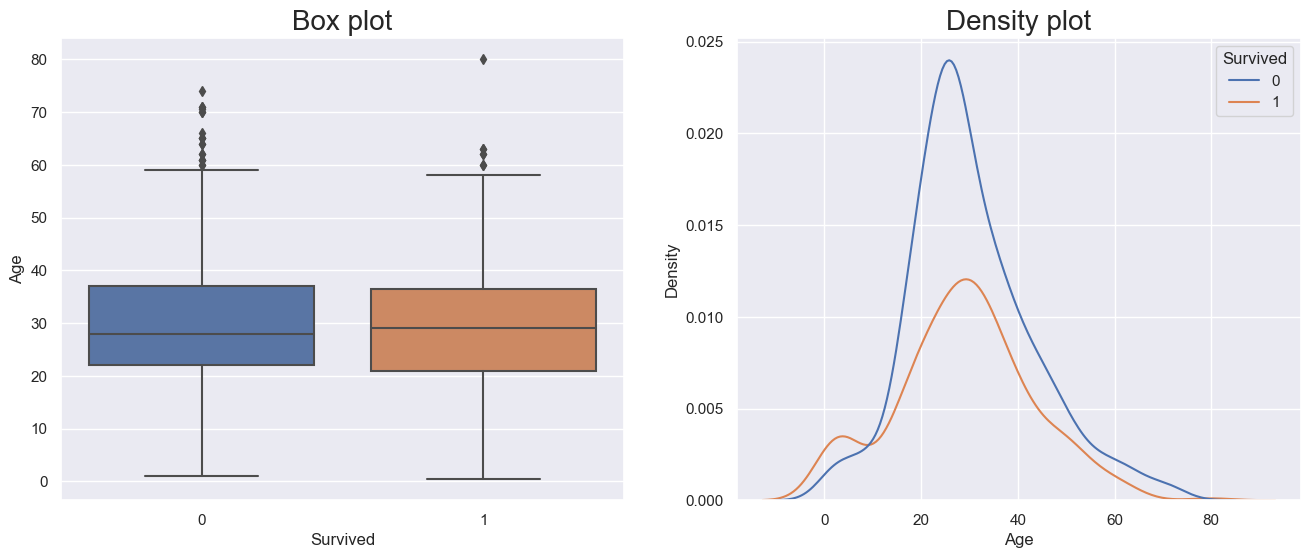

In [55]:
## Age of the people who survived

sns.set(rc = {'figure.figsize':(16,6)})
plt.plot(figure_size = (1,2))

#Boxplots
plt.subplot(1,2,1)
bp_ax = sns.boxplot(x = "Survived",y="Age", data = train_df)
bp_ax.set_title('Box plot', fontsize = 20)

#Density plots
plt.subplot(1,2,2)
dp_ax = sns.kdeplot(x = 'Age', hue = 'Survived', data = train_df)
dp_ax.set_title('Density plot', fontsize = 20)
plt.show()

* Distribution of people who didn't survive is slightly right skewed, or the mean of the people who did not survive > median of the distribution which is around ~27, i.e. mean age of the people who did not survive is higher than 27


* People of ages > ~67 are considered outliers in the disb of people who did not survive. owing to the fact people above the age of ~67 are very less and people of age ~60 above are outliers in the disb of people who did survive, i.e. very few people above 60 actually did survive

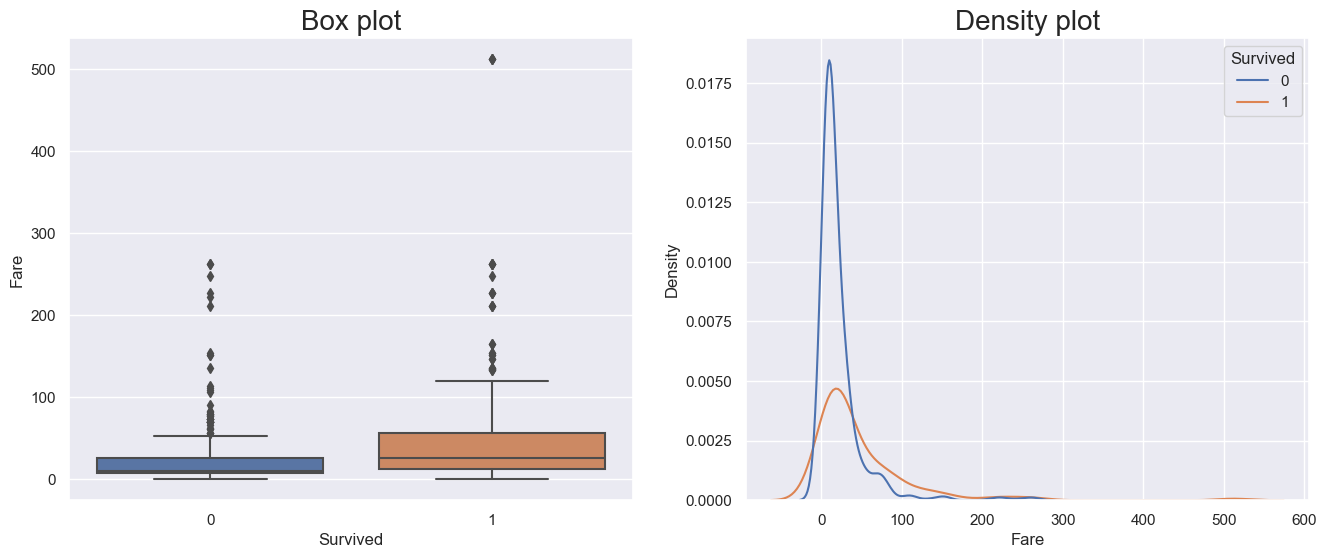

In [56]:
## Fares of the survivors

sns.set(rc = {'figure.figsize':(16,6)})
plt.plot(figure_size = (1,2))

#Boxplots
plt.subplot(1,2,1)
bp_ax = sns.boxplot(x = "Survived",y="Fare", data = train_df)
bp_ax.set_title('Box plot', fontsize = 20)

#Density plots
plt.subplot(1,2,2)
dp_ax = sns.kdeplot(x = 'Fare', hue = 'Survived', data = train_df)
dp_ax.set_title('Density plot', fontsize = 20)
plt.show()

* Distribution of fares of survivors clearly has a higher median value, hence passengers who survived had higher average fares

* Lots of outliers in the distribution of both

* A huge spike in the pdf of the people who didn't survive, or the probability that the person who didn't survive had a fare of ~10 units of currency is very high

#### Survival Based Upon Embarked Label

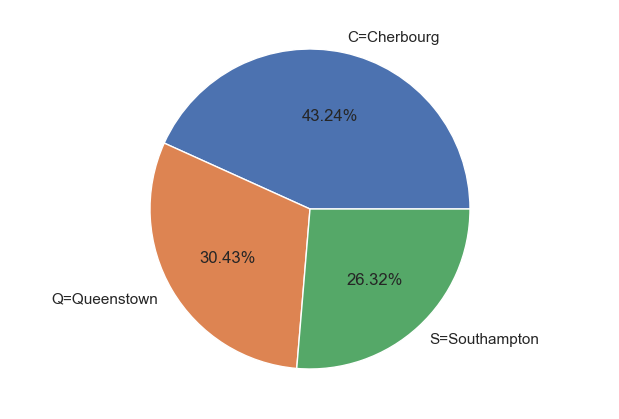

In [57]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_axes([0,0,1,1])
ax.axis("equal")
l=["C=Cherbourg", "Q=Queenstown", "S=Southampton"]
s=[0.553571, 0.389610, 0.336957]
ax.pie(s, labels=l, autopct="%1.2f%%")
plt.show()

In [58]:
# Convert the string values to integers (Encoding)

for data in [train_df]:
    
    data["Sex"]=data["Sex"].map({"female":1, "male":0})
    
    data["Embarked"]=data["Embarked"].map({"S":0, "C":1, "Q":2})
    
    data["Title"]=data["Title"].map({"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":4, "Rev":5, "Soldier":6, "the Countess":7}).astype(int)

In [59]:
# test data

for data in [test_df]:
    
    data["Sex"]=data["Sex"].map({"female":1, "male":0})
    
    data["Embarked"]=data["Embarked"].map({"S":0, "C":1, "Q":2})
    
    data["Title"]=data["Title"].map({"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":4, "Rev":5, "Soldier":6, "the Countess":7}).astype(int)

In [60]:
train_df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Child,Toddler,Elderly,CabinN,Fancy,Standard_Fare
106,107,1,3.0,"Salkjelsvik, Miss. Anna Kristine",1,21.0,0.0,0.0,343120,7.6500,nan,0,1,1,0,0,0,1,0,1
479,480,1,3.0,"Hirvonen, Miss. Hildur E",1,2.0,0.0,1.0,3101298,12.2875,nan,0,1,2,0,1,0,1,0,0


### Remove Unneccesary Features

In [61]:
train_df = train_df.drop(['Name','PassengerId', 'Ticket', 'Cabin', 'Fare', 'SibSp'], axis = 1)
test_df = test_df.drop(['Name','PassengerId', 'Ticket', 'Cabin', 'Fare', 'SibSp'], axis = 1)



In [62]:
train_df.sample(2)

,Survived,Pclass,Sex,Age,Parch,Embarked,Title,Family_Size,Child,Toddler,Elderly,CabinN,Fancy,Standard_Fare
225,0,3.0,0,22.0,0.0,0,0,1,0,0,0,1,0,1
630,1,1.0,0,80.0,0.0,0,0,1,0,0,1,0,0,0


# AdaBoosting Classifier

## Train | Test Split

In [63]:
from sklearn.model_selection import train_test_split

X=train_df.drop(columns="Survived")
y=train_df["Survived"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling and Model Performance

In [65]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [66]:
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [67]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [68]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[88 17]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


Train_Set
[[392  52]
 [ 66 202]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       444
           1       0.80      0.75      0.77       268

    accuracy                           0.83       712
   macro avg       0.83      0.82      0.82       712
weighted avg       0.83      0.83      0.83       712



In [69]:
from sklearn.model_selection import cross_val_score, cross_validate

model = AdaBoostClassifier(n_estimators=50, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.828697
test_precision    0.790512
test_recall       0.742450
test_f1           0.763828
dtype: float64

In [70]:
error_rates = []

for n in range(1,100):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test,preds)
    
    error_rates.append(err)

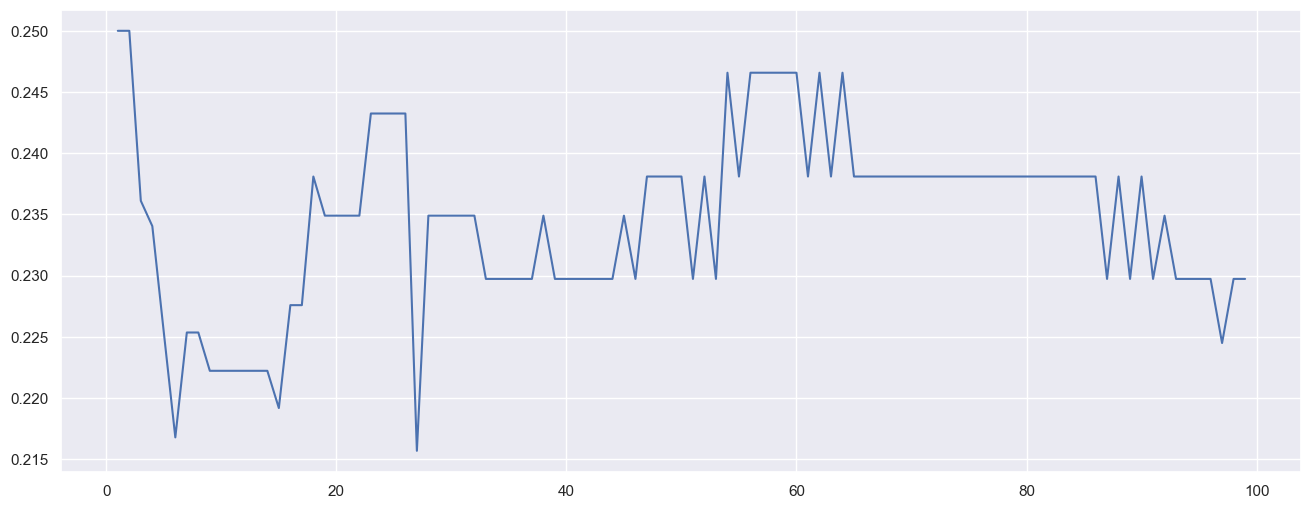

In [71]:
plt.plot(range(1,100), error_rates);

## Gridsearch

In [72]:
from sklearn.model_selection import GridSearchCV

model = AdaBoostClassifier(random_state=42)

param_grid = {"n_estimators": [20, 30, 100, 200], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

ada_grid_model = GridSearchCV(model, param_grid, cv=5, scoring= 'f1')

In [73]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [20, 30, 100, 200]},
             scoring='f1')

In [74]:
ada_grid_model.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [75]:
y_pred = ada_grid_model.predict(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[91 14]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179


Train_Set
[[397  47]
 [ 69 199]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       444
           1       0.81      0.74      0.77       268

    accuracy                           0.84       712
   macro avg       0.83      0.82      0.82       712
weighted avg       0.84      0.84      0.84       712



In [76]:
## with the short code in same cell

ada = AdaBoostClassifier()
parameters = {'n_estimators':[10,50,100], 'random_state': [42, 138], 'learning_rate': [0.1, 0.5, 0.8, 1.0]}
ada_clf = GridSearchCV(ada, parameters)
ada_clf.fit(X_train, y_train)

'''CROSS VALIDATE'''
cv_results = cross_validate(ada_clf, X_train, y_train)
cv_results['test_score']  

y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8212290502793296


In [77]:
print(f1_score(y_test, y_pred))

0.7746478873239436


In [78]:
print(recall_score(y_test, y_pred))

0.7432432432432432


In [79]:
y_pred = ada_clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[92, 13],
       [19, 55]])

## Feature_importances

In [80]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance")
ada_imp_feats

,ada_importance
Child,0.00
Toddler,0.00
Elderly,0.00
Fancy,0.00
Standard_Fare,0.00
Parch,0.01
Embarked,0.05
Pclass,0.10
Family_Size,0.10
Sex,0.11


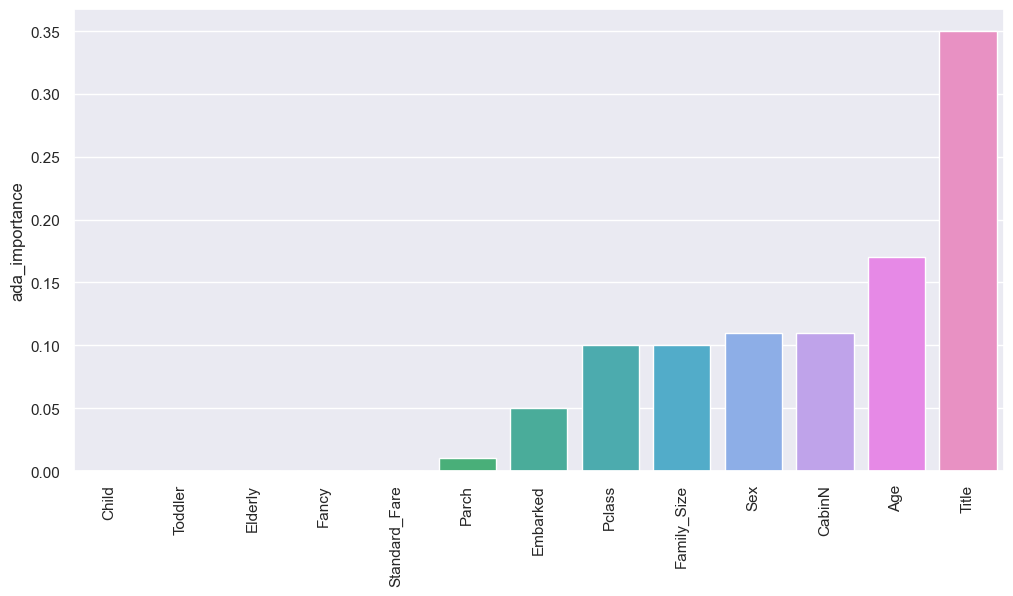

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

In [82]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

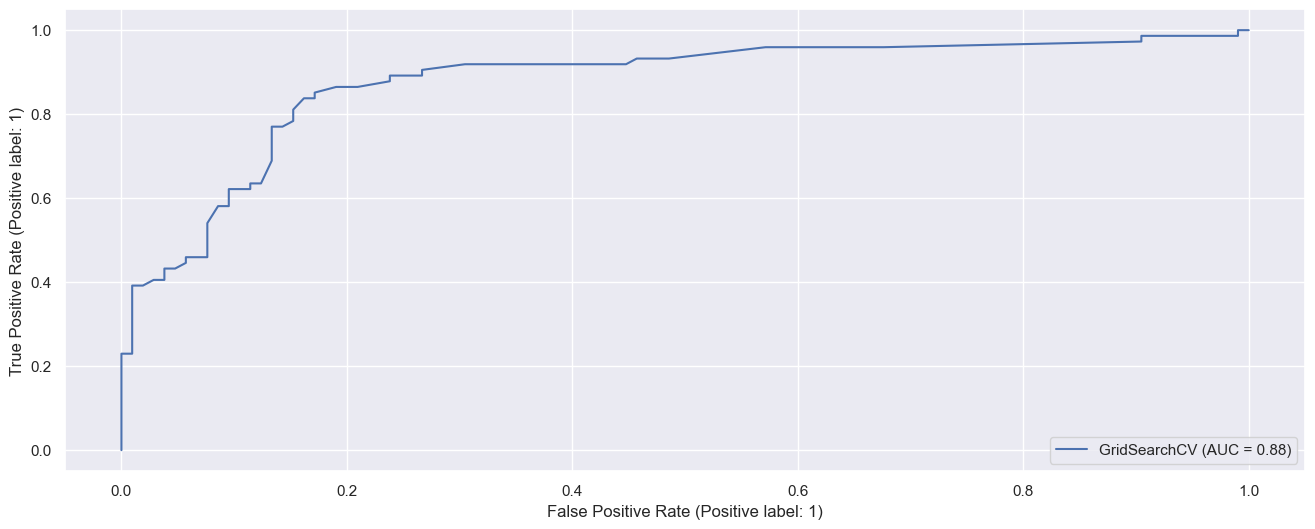

In [83]:
plot_roc_curve(ada_grid_model, X_test, y_test);

# GradientBoosting Classifier

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
grad_model = GradientBoostingClassifier(random_state=42)

In [86]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [87]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[95 10]
 [18 56]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.85      0.76      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179


Train_Set
[[426  18]
 [ 62 206]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       444
           1       0.92      0.77      0.84       268

    accuracy                           0.89       712
   macro avg       0.90      0.86      0.88       712
weighted avg       0.89      0.89      0.89       712



In [88]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.825919
test_precision    0.816060
test_recall       0.690741
test_f1           0.745934
test_roc_auc      0.854898
dtype: float64

## GridSearch

In [89]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]}

In [90]:
gb_model = GradientBoostingClassifier(random_state=42)

In [91]:
grid = GridSearchCV(gb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Int

In [92]:
y_pred = grid.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[89 16]
 [19 55]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


Train_Set
[[420  24]
 [ 67 201]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       444
           1       0.89      0.75      0.82       268

    accuracy                           0.87       712
   macro avg       0.88      0.85      0.86       712
weighted avg       0.87      0.87      0.87       712



In [93]:
## with the short code in same cell

gradBoost = GradientBoostingClassifier()
parameters = {'n_estimators':[10,50,100], 'random_state': [42, 138], 'learning_rate': [0.1, 0.5, 0.8, 1.0], \
             'loss' : ['deviance', 'exponential']}
gb_clf = GridSearchCV(gradBoost, parameters)
gb_clf.fit(X_train, y_train)

'''CROSS VALIDATE'''
cv_results = cross_validate(gb_clf, X_train, y_train)
cv_results['test_score']  

y_pred = gb_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8212290502793296


## Feature importances

In [94]:
model = GradientBoostingClassifier(max_features= 3, n_estimators = 100, subsample = 0.5, random_state=42)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

,grad_importance
Elderly,0.008167
Child,0.011504
Standard_Fare,0.024140
Toddler,0.025875
Fancy,0.029991
Embarked,0.031859
Parch,0.036375
CabinN,0.056585
Family_Size,0.096226
Pclass,0.108164


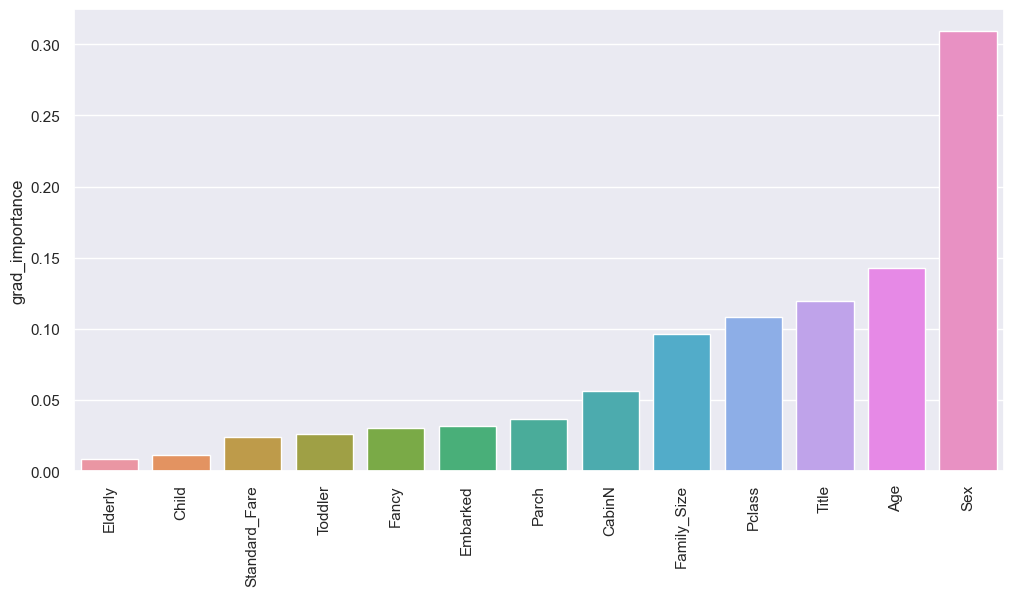

In [95]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

## valuating ROC Curves and AUC

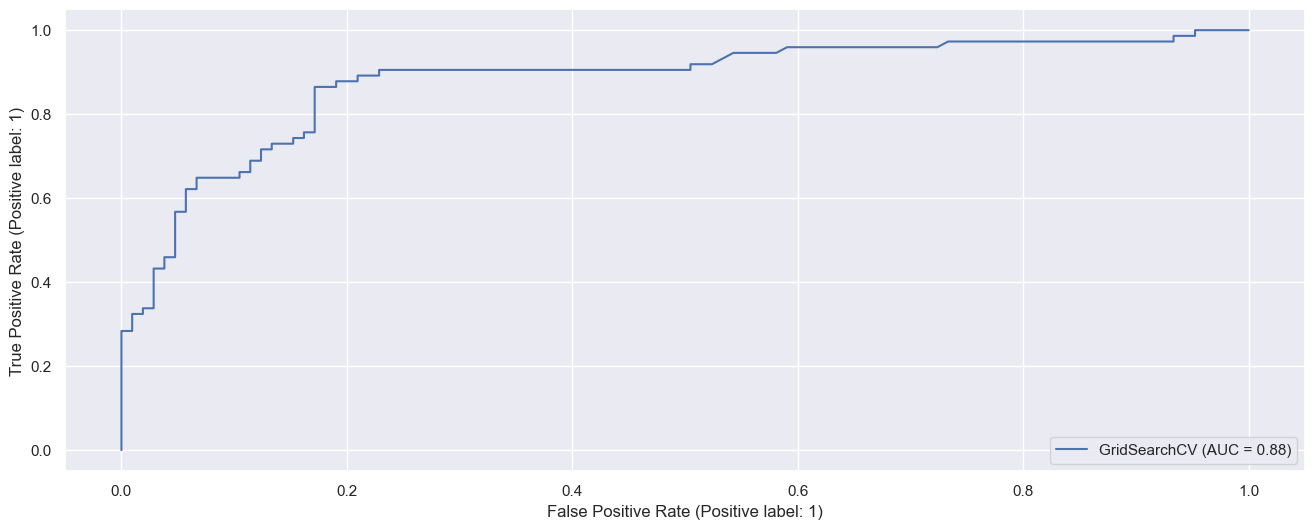

In [96]:
plot_roc_curve(grid, X_test, y_test);

# XGBoosting Classifier

In [97]:
from xgboost import XGBClassifier

In [98]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

In [99]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[91 14]
 [16 58]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179


Train_Set
[[437   7]
 [ 26 242]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       444
           1       0.97      0.90      0.94       268

    accuracy                           0.95       712
   macro avg       0.96      0.94      0.95       712
weighted avg       0.95      0.95      0.95       712



In [100]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.797887
test_precision    0.751241
test_recall       0.687037
test_f1           0.716296
test_roc_auc      0.836162
dtype: float64

## Gridsearch

In [101]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [102]:
xgb_model = XGBClassifier(random_state=42)

In [103]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [104]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 50,
 'subsample': 0.5}

In [105]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[92 13]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179


Train_Set
[[413  31]
 [ 62 206]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       444
           1       0.87      0.77      0.82       268

    accuracy                           0.87       712
   macro avg       0.87      0.85      0.86       712
weighted avg       0.87      0.87      0.87       712



In [106]:
## with the short code in same cell

xg =XGBClassifier(max_depth = 3, n_estimators = 400, learning_rate = 0.1)
xg.fit(X_train, y_train)

'''CROSS VALIDATE'''
cv_results = cross_validate(xg, X_train, y_train)
cv_results['test_score']  

y_pred = xg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8379888268156425


## Feature importances

In [107]:
model = XGBClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

,xgb_importance
Elderly,0.024549
Parch,0.027012
Child,0.028429
Fancy,0.030591
Embarked,0.038607
Standard_Fare,0.046456
Toddler,0.048585
Family_Size,0.060577
Age,0.069402
CabinN,0.095794


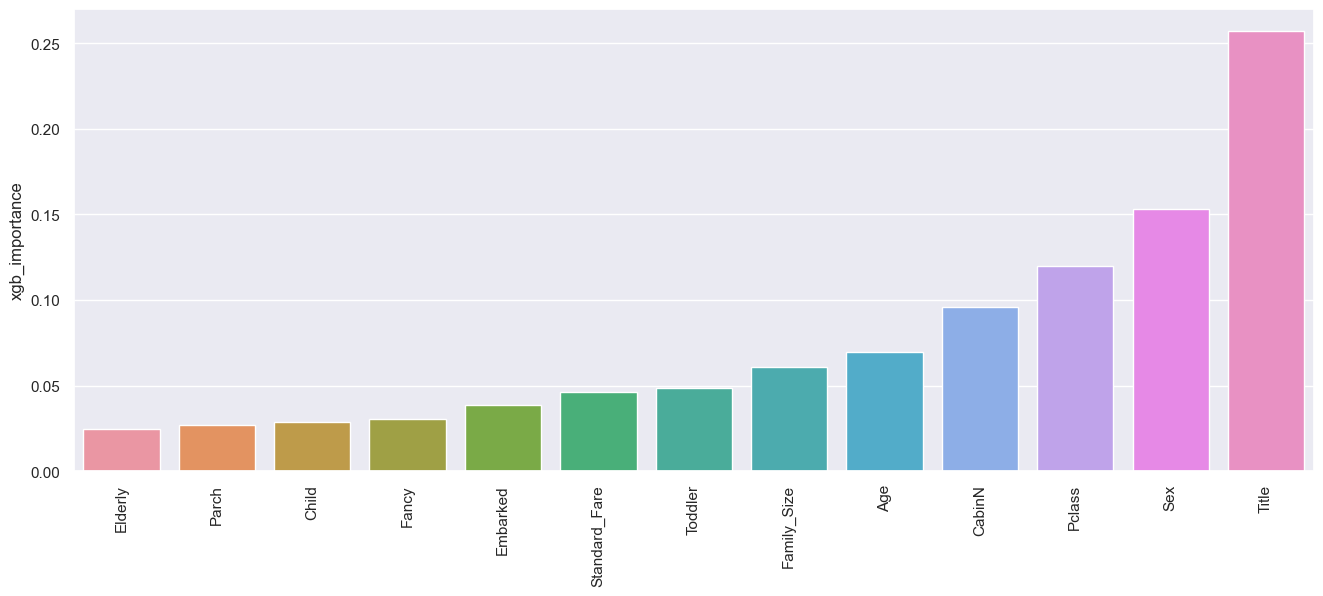

In [108]:
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')

plt.xticks(rotation=90);

## Feature importance comparison

In [109]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_importance,grad_importance,xgb_importance
Child,0.00,0.011504,0.028429
Toddler,0.00,0.025875,0.048585
Elderly,0.00,0.008167,0.024549
Fancy,0.00,0.029991,0.030591
Standard_Fare,0.00,0.024140,0.046456
Parch,0.01,0.036375,0.027012
Embarked,0.05,0.031859,0.038607
Pclass,0.10,0.108164,0.119684
Family_Size,0.10,0.096226,0.060577
Sex,0.11,0.309284,0.153125


## Evaluating ROC Curves and AUC

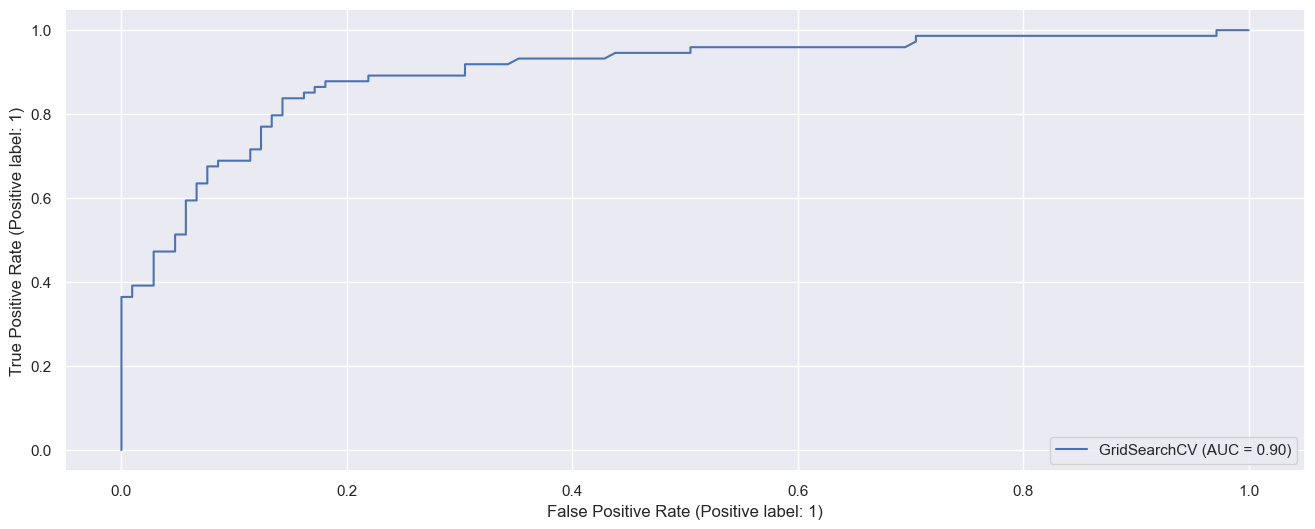

In [110]:
plot_roc_curve(xgb_grid, X_test, y_test);

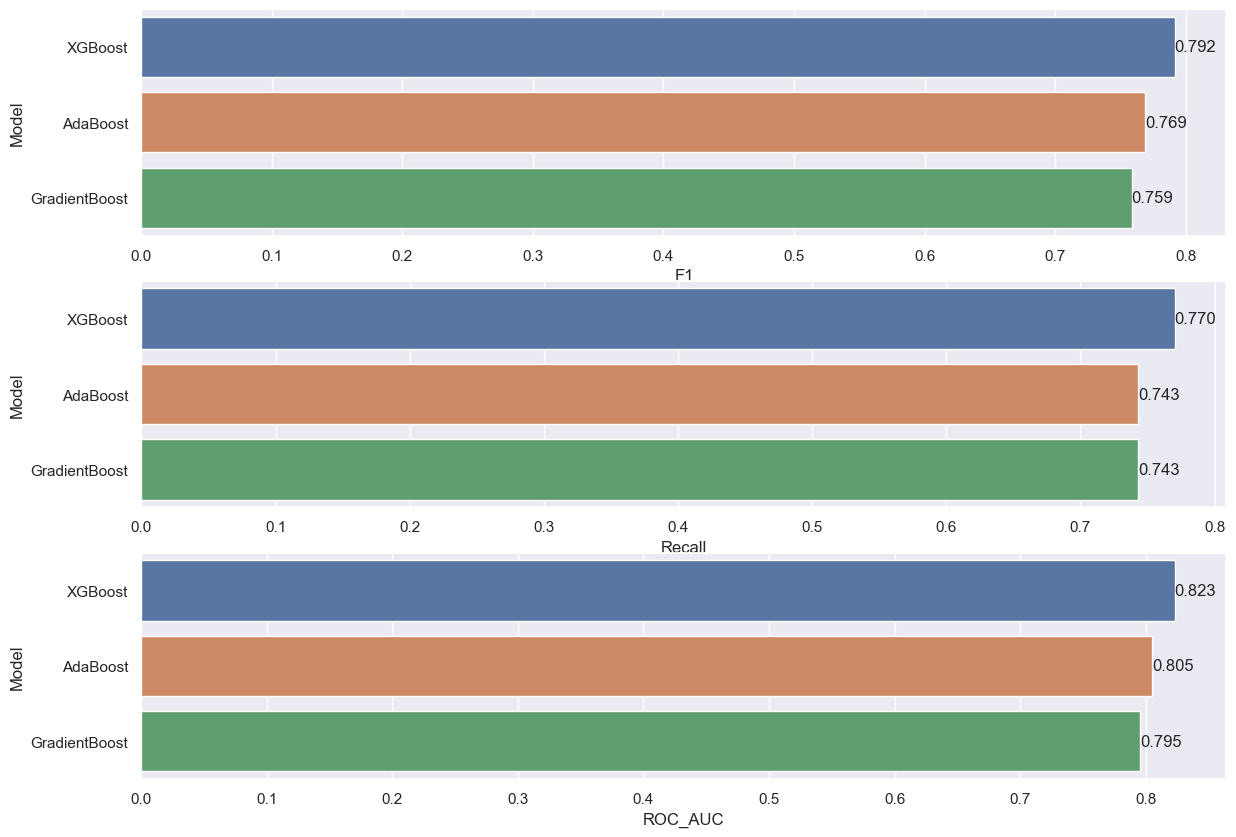

In [111]:
compare = pd.DataFrame({"Model": [ "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [  ada_f1, gb_f1, xgb_f1],
                        "Recall": [ ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [ ada_auc, gb_auc, xgb_auc]})


def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare)
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare)
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare)
labels(ax)



plt.show()

In [112]:
xg =XGBClassifier(max_depth = 3, n_estimators = 400, learning_rate = 0.1)
xg.fit(X_train, y_train)

'''CROSS VALIDATE'''
cv_results = cross_validate(xg, X, y)
predictions = xg.predict(test_df)

sub['Survived'] = predictions
sub.to_csv("first_submission_xg.csv", index=False)

In [117]:
df=pd.read_csv("first_submission_xg.csv")
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


## Conclusion
Hypotheses:

* Females have a higher survival rate.

* Age distribution of survived is different from perished.



 Although females consituted a minority in the passengers onboard, they had higher survival rate than men and formed the majority of the survived population. Among different classes, passengers in 1st class had a higher survival rate. In particular the best chance of survival was for females in 1st and 2nd class where almost all survived. The distribution of survived among different classes was similar. Most of the passengers from 3rd class did not survive since the 3rd class had a larger population mostly males.


Although survived and perished passengers had similar median age, the age distribution of survived were more spread out with more young population (infants and kids). Most of the perished were around the age of 28. A significant number of the entries were missing in the age column and hence the result could be biased and has to be interpreted with higher margin of error.


Survival rate based on the embarked ports showed a highest for Cherbourg while most of the passengers boarded from Southampton.


It is notable that larger majority of the passengers did not have a parent, child, sibling or spouse onboard with them and half of the passengers who had atleast one parent/child/sibling/spouse had survived.


Based on the analysis person with highest chance of survival: Female, 1st class, embarked-cherbourg, age-28yrs, Fare-48, with atleast one person onboard.


** Limitations:**

* The analysis has not taken into account the duplication of data. It has been asumed that each entry is unique.

* Rows with missing values in columns (Age, Cabin, Emabarked) have been removed for the analysis of corresponding columns. This reduces the fidelity of the analysis based on available data.

* The dataset is only a subset of total original passengers onboard and the factors such as survival rate could vary.

* The passsengers could have given wrong information regarding their passenger name, class, age and fare so as to have access to life boats. Especially passengers could have pretended to have accompanying parents/children/siblings/spouses to gain access to life boats.

* The age, fare, passenger class and name of infants/kids/elderly/disabled could have been assumed by the interviewer resulting in wrongful entries.